In [170]:
# Classification with CNN
# Fashion MNist

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
import pandas as pd
import seaborn as sns

In [171]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = f_mnist.load_data()

print(X_train.shape)
print(X_test.shape)




(60000, 28, 28)
(10000, 28, 28)


In [172]:
# this is 2D array (but CNN needs 3D array)
# CNN needs height x and width x color
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [173]:
# k = len(np.unique(Y_train))
k = len(set(Y_train))
print("number of classes:", k)

print("shape: ",X_train[0].shape)

number of classes: 10
shape:  (28, 28, 1)


In [174]:
# Build the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(k, activation='softmax')(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) # Add the new Dense layer with regularization here
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

model.compile(
                 optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
             )

# Optimize Learning Rate
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Reduce learning rate if validation loss doesn't improve
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train with Callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15, callbacks=[early_stop, lr_scheduler])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7446 - loss: 1.0171 - val_accuracy: 0.8446 - val_loss: 0.5085 - learning_rate: 0.0010
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8490 - loss: 0.4755 - val_accuracy: 0.8606 - val_loss: 0.4181 - learning_rate: 0.0010
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8674 - loss: 0.3903 - val_accuracy: 0.8601 - val_loss: 0.4003 - learning_rate: 0.0010
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8742 - loss: 0.3529 - val_accuracy: 0.8748 - val_loss: 0.3656 - learning_rate: 0.0010
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8863 - loss: 0.3298 - val_accuracy: 0.8707 - val_loss: 0.3668 - learning_rate: 0.0010
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8886 - loss: 0.3121 - val_accuracy: 0.8648 - val_loss: 0.3847 - learning_rate: 0.0010
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.899

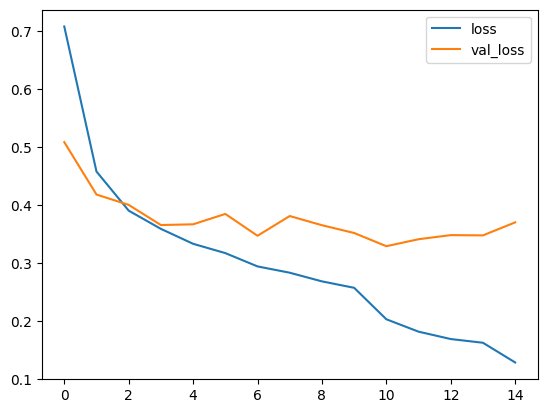

In [175]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


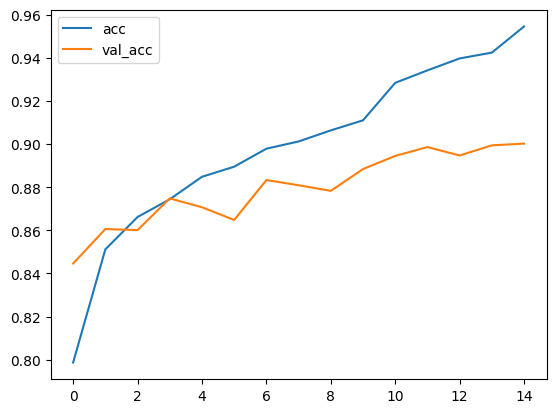

In [176]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [177]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_test, Y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


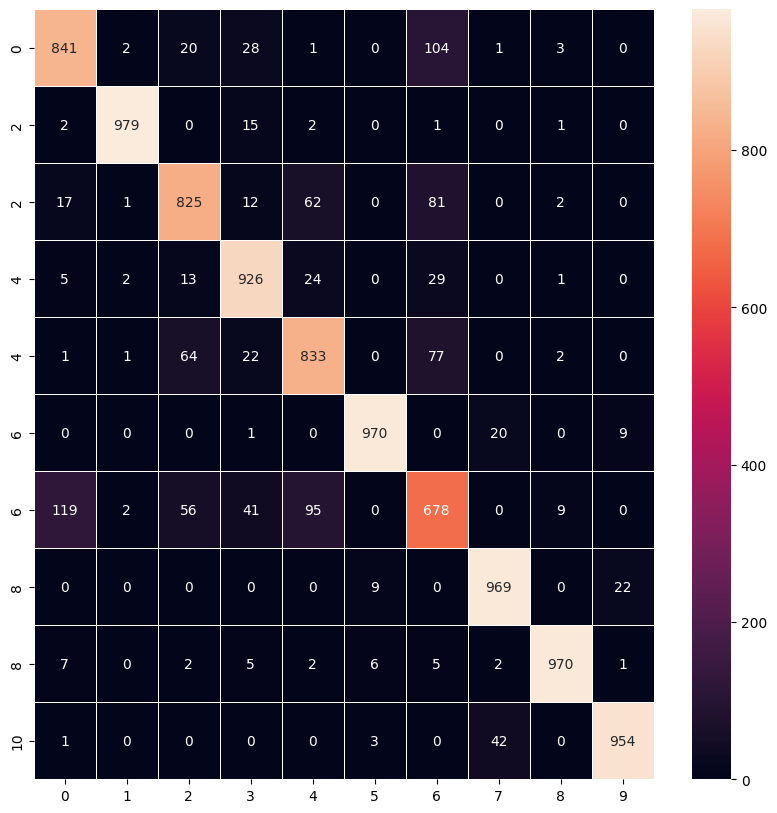

In [178]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(cm, annot=True, linewidths=0.5, fmt="d", ax=ax) #fmt="d" to display the values in the heatmap as integers
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.draw()
plt.show()




In [180]:
# pip install --upgrade scikit-learn

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[841   2  20  28   1   0 104   1   3   0]
 [  2 979   0  15   2   0   1   0   1   0]
 [ 17   1 825  12  62   0  81   0   2   0]
 [  5   2  13 926  24   0  29   0   1   0]
 [  1   1  64  22 833   0  77   0   2   0]
 [  0   0   0   1   0 970   0  20   0   9]
 [119   2  56  41  95   0 678   0   9   0]
 [  0   0   0   0   0   9   0 969   0  22]
 [  7   0   2   5   2   6   5   2 970   1]
 [  1   0   0   0   0   3   0  42   0 954]]


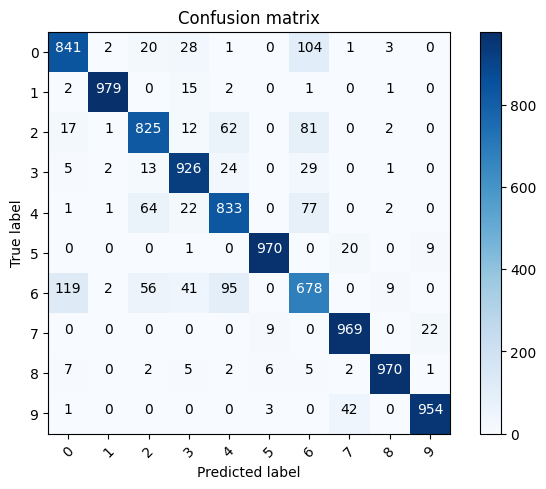

In [181]:
#predict
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


all labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
60000


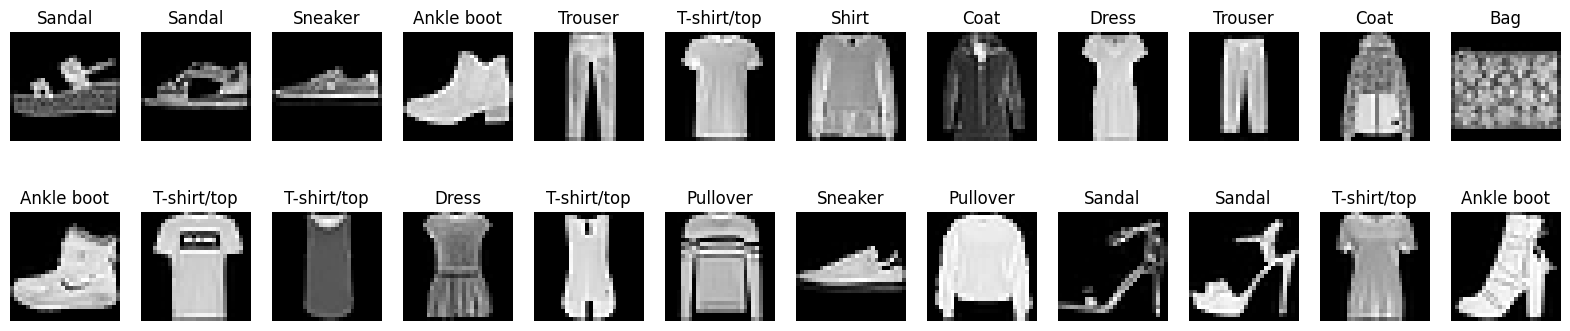

In [182]:
# Label mapping
# labels = '''T-shirts/top
# Trouser
# Pullover
# Dress
# Coat
# Sandal
# Boot
# Shirt'''.split()

# print(labels)

import torchvision.datasets as datasets
fashion_mnist = datasets.FashionMNIST(root='data', download=True)
labels = fashion_mnist.classes

print("all labels:", labels)
print(len(X_train))

import matplotlib.pyplot as plt


plt.figure(figsize=(20, 7))

row = 1
col = 1
idx = 1

for i in range(24):
    plt.subplot(row, 12, idx)

    plt.imshow(X_train[i], cmap='gray')
    plt.title(labels[Y_train[i]])
    plt.axis('off')

    # print(row,idx)

    if(idx == 12):
        row += 1
        idx = 1
        # print(row, idx)
    else:
        idx += 1

plt.subplots_adjust(hspace=1.0)
plt.show()



misclassified examples count:  1055


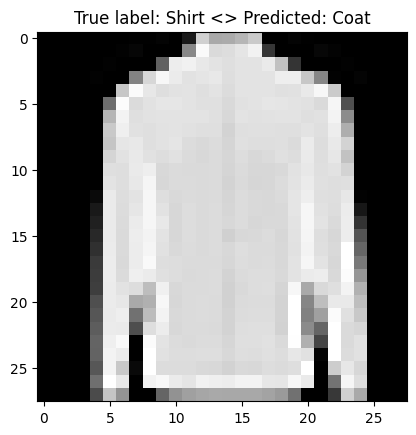

In [197]:
# show some misclassified example
misclassified_idx = np.where(p_test != Y_test)[0]
print("misclassified examples count: ", len(misclassified_idx))
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s <> Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));


correct classified examples count:  8940


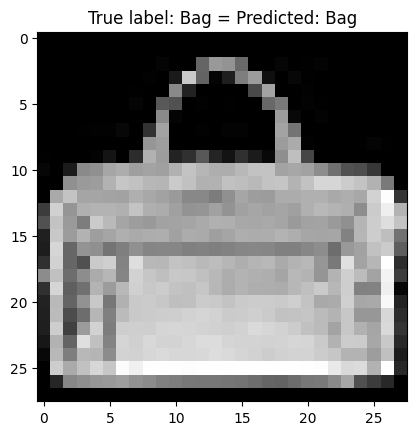

In [169]:
# show some correct classified example
ok  = np.where(p_test == Y_test)
not_ok  = np.where(p_test != Y_test)

corrclassified_idx = np.where(p_test == Y_test)[0]
print("correct classified examples count: ", len(corrclassified_idx))
i = np.random.choice(corrclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s = Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));
